 <h1 align="center">DECISION TREE AND RANDOM FOREST</h1>
 
A decision tree is a supervised machine learning algorithm that can be used for both classification and regression problems. A decision tree is simply a series of sequential decisions made to reach a specific result. Here’s an illustration of a decision tree in action:

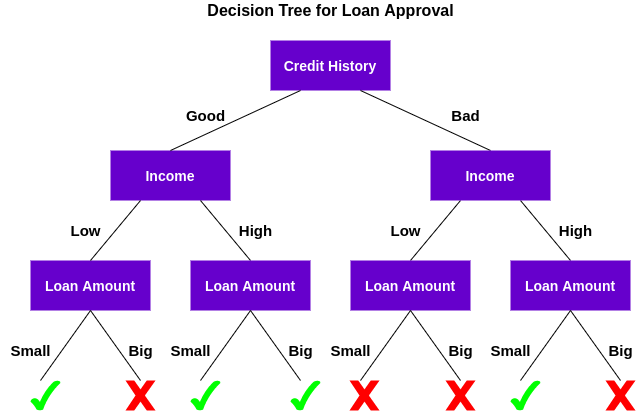

First, it checks if the customer has a good credit history. Based on that, it classifies the customer into two groups, i.e., customers with good credit history and customers with bad credit history. Then, it checks the income of the customer and again classifies him/her into two groups. Finally, it checks the loan amount requested by the customer. Based on the outcomes from checking these three features, the decision tree decides if the customer’s loan should be approved or not.

The decision tree algorithm is quite easy to understand and interpret. But often, a single tree is not sufficient for producing effective results. This is where the Random Forest algorithm comes into the picture.

### Random Forest

Random Forest is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions. As the name suggests, it is a “forest” of trees!

It is call random forest it is a forest of randomly created decision trees. Each node in the decision tree works on a random subset of features to calculate the output. The random forest then combines the output of individual decision trees to generate the final output. The Random Forest Algorithm combines the output of multiple (randomly created) Decision Trees to generate the final output.

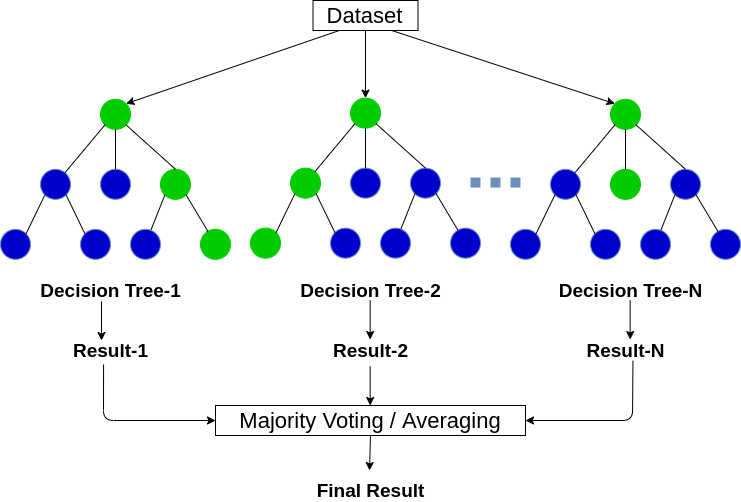

This process of combining the output of multiple individual models (also known as weak learners) is called Ensemble Learning.
 
 ### Task
 
As in the previous projects, the objective for the decision tree and randon forest algorithms is to classify the coffees of three countries, (Colombia, Taiwan and Guatemala) using three and five clasification elements. As we have been showing,this classification is a difficult task, especially for coffees from Colombia and Guatemala. Until now, the best results were obtained with the k neighbors algorithm. We will analyze the successful classification values of this algorithm using the confusion matrix (I have a higher expectation with this algorith, lets see what happens!). 
 
 

### Cool Coffee Fact!. Why Taiwan produce high quality coffee?.

In 1884, Taiwan received its first coffee plants from the British. Arabica production grew exponentially following Japan’s occupation of Taiwan throughout the early 1900s. The Japanese, who were fond of coffee, brought more coffee seedlings from Hawaii and planted them in Yunlin County.  The Japanese grew coffee as a luxury crop to send back to their own country. Some even say that coffee was often sent from Taiwan to Japan’s emperor as a form of tribute. Over the years, coffee would grow to be a favorite amongst Taiwanese locals, eventually rivaling the tea that had been a household favorite generations before.
Today, and due to an incresing consumption in Asia market, coffee production is prominent in the Taiwanese regions of Alishan and Pingtung County’s Taiwu Village. However, Yulin County remains the country’s star coffee producer, with a climate and altitude similar to Jamaica’s famed Blue Mountains. The high mountains, volcanic soil, cool temperatures, and abundance of spring water in this region result in an incredible Arabica bean, with low acidity and notes of nuts and citrus.                                                                
                                                                                    Source:https://www.baristamagazine.com/

### Random Forest 3 countries, 5 elements


In [33]:
#Libraries used in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### Decision tree, three countries and five parameters 

In [53]:
cafe = pd.read_csv("coffee_data.csv")
cafe.rename(columns = {'Country.of.Origin':'Country'}, inplace = True)
values=['Guatemala','Taiwan', 'Colombia']
cafe_filter= cafe[cafe.Country.isin(values)]
X1 = cafe_filter[['Aftertaste', 'Balance','altitude_mean_meters', 'Aroma', 'Flavor']]
y1 = cafe_filter['Country']
X2 = cafe_filter[['Balance','altitude_mean_meters', 'Flavor']]
y2 = cafe_filter['Country']

In [58]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3,random_state=42)
dt1= DecisionTreeClassifier()
dt1.fit(X1_train, y1_train)
print ("Train Accuracy :", metrics.accuracy_score(y1_train,dt1.predict(X1_train)))
print ("Test Accuracy :", metrics.accuracy_score(y1_test,dt1.predict(X1_test)))

Train Accuracy : 1.0
Test Accuracy : 0.8058252427184466


Text(0.5, 1.0, 'Confusion matrix for Decision Tree')

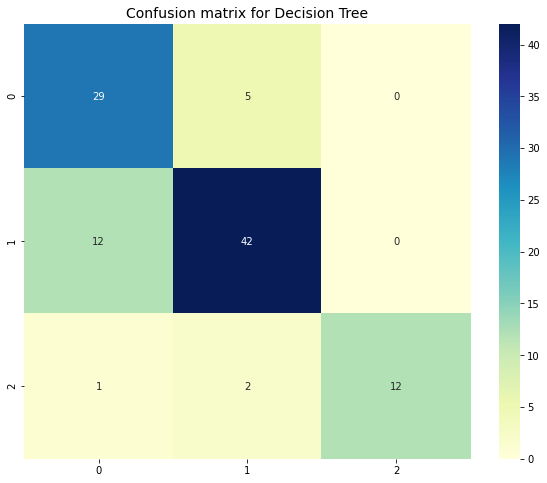

In [41]:
y_pred_dt1 = dt1.predict(X1_test)
fig = plt.figure(figsize = (10,8))
cm_dt1 = confusion_matrix(y1_test, y_pred_dt1)
sns.heatmap(cm_dt1,annot=True,fmt='g',cmap="YlGnBu")
plt.title('Confusion matrix for Decision Tree',fontsize=14)

El desicion tree deliver good results, 80% for 5 parameters and 87% for 3 parameters. This result is higher than the previous tested algorithms. It is pretty interested that reducing the amount of parameter leads to a better clasification rate. I think this is because the additional elements fluctuate between all the coffee data from the different countries in a complex way, generating aditional noise in the classification process.

### Decision tree, three countries, 3 parameters 

In [56]:
dt2= DecisionTreeClassifier()
dt2.fit(X2_train, y2_train)
print ("Train Accuracy :", metrics.accuracy_score(y2_train,dt2.predict(X2_train)))
print ("Test Accuracy :", metrics.accuracy_score(y2_test,dt2.predict(X2_test)))

Train Accuracy : 1.0
Test Accuracy : 0.8737864077669902


Text(0.5, 1.0, 'Confusion matrix for Decision Tree')

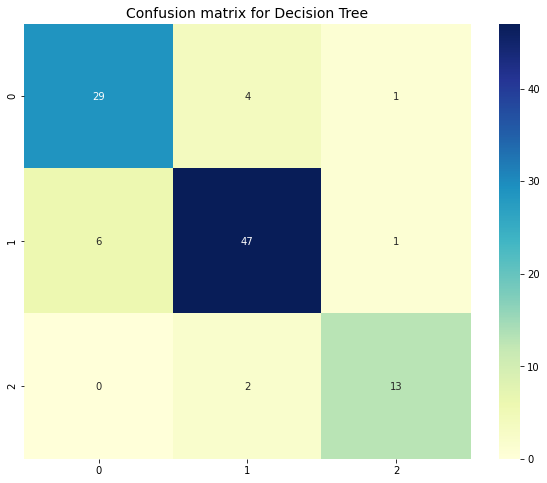

In [47]:
y_pred_dt2 = dt2.predict(X2_test)
fig = plt.figure(figsize = (10,8))
cm_dt2 = confusion_matrix(y2_test, y_pred_dt2)
sns.heatmap(cm_dt2,annot=True,fmt='g',cmap="YlGnBu")
plt.title('Confusion matrix for Decision Tree',fontsize=14)

### Random forest, three countries and five parameters 

In [57]:
rf = RandomForestClassifier()
rf.fit(X1_train, y1_train)
print ("Train Accuracy :", metrics.accuracy_score(y1_train,rf.predict(X1_train)))
print ("Test Accuray :", metrics.accuracy_score(y1_test,rf.predict(X1_test)))


Train Accuracy : 1.0
Test Accuray : 0.8446601941747572


Text(0.5, 1.0, 'Confusion matrix for Random Forest')

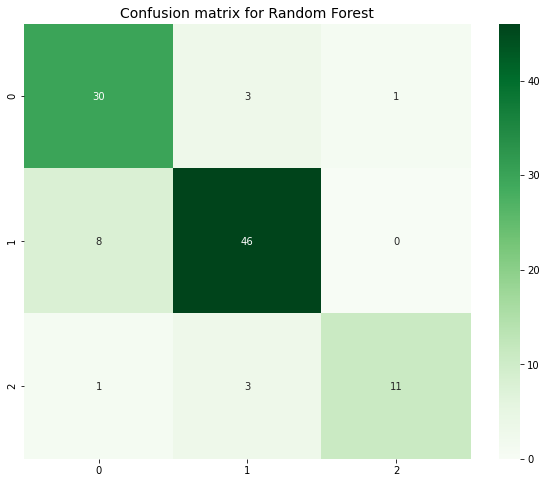

In [50]:
y_pred_rf = rf.predict(X1_test)
fig = plt.figure(figsize = (10,8))
cm_rf = confusion_matrix(y1_test, y_pred_rf)
sns.heatmap(cm_rf,annot=True,fmt='g',cmap="Greens")
plt.title('Confusion matrix for Random Forest',fontsize=14)

### Random forest for three countries, 3 parameters

In [61]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3,random_state=42)

In [63]:
rf_2 = RandomForestClassifier()
rf_2.fit(X2_train, y2_train)
rf_2.fit(X2_test, y2_test)
print ("Train - Accuracy :", metrics.accuracy_score(y2_train,rf_2.predict(X2_train)))
print ("Train - Test :", metrics.accuracy_score(y2_test,rf_2.predict(X2_test)))


Train - Accuracy : 0.7941176470588235
Train - Test : 0.9902912621359223


Text(0.5, 1.0, 'Confusion matrix for Random Forest')

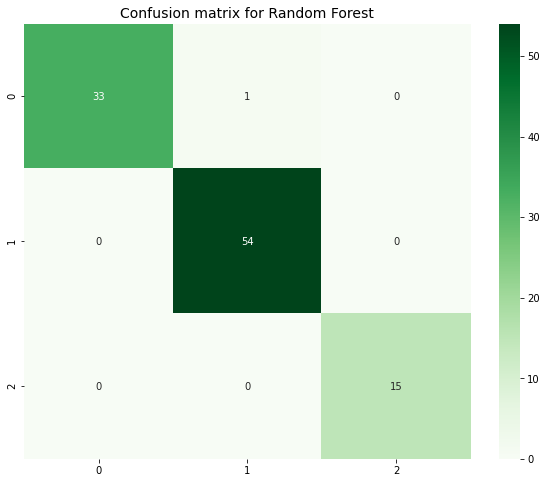

In [51]:
y2_pred_rf = rf_2.predict(X2_test)
fig = plt.figure(figsize = (10,8))
cm_rf2 = confusion_matrix(y2_test, y2_pred_rf)
sns.heatmap(cm_rf2,annot=True,fmt='g',cmap="Greens")
plt.title('Confusion matrix for Random Forest',fontsize=14)

The results obtained using random forest are incredible. For 3 parameters the classification results are 85% (similar to k neighboors algorith); but using 3 parameters the results increase up to 98%!! It is a result that goes beyond what was expected and is definitely the winning algorithm in this entire project.